# PART 7 - ML XGBOOST

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
happy_df=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Happiness_df ready for ML.csv')

In [3]:
happy_df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
happy_df

,Happines_score,GDP,Social_support,Life_exp_score,Freedom,Generosity,Gov_trust,Life_exp_age
0,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,73.099998
1,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,72.099998
2,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,73.000000
3,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,73.800003
4,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,71.800003
...,...,...,...,...,...,...,...,...
615,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,45.200001
616,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,61.098846
617,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,55.617260
618,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,51.000000


In [5]:
# function to calculate the metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

def print_score(clf, X_train, y_train, X_test, y_test,train=True):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: clf-> model to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
    
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        
        print(f"MAE: {MAE_train:.4f}\n")
        print(f"MSE: {MSE_train:.4f}\n")
        print(f"RMSE: {RMSE_train:.4f}\n")
        print(f"R^2: {R2_train:.4f}\n")
        print('================================================================')
        cv_scores = cross_val_score(clf, X_train, 
                            y_train,cv=10, scoring='r2') # Let's define the K and the 

        print('Cross Validation R2_score for train set: {}'.format(cv_scores.round(2)))
        print("\nAverage 10-Fold CV R2_score for train set: {}".format(np.mean(cv_scores).round(3)))
        print()   
        
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        print(f"MAE: {MAE_test:.4f}\n")
        print(f"MSE: {MSE_test:.4f}\n")
        print(f"RMSE: {RMSE_test:.4f}\n")
        print(f"R^2: {R2_test:.4f}\n")
        
        cv_scores2 = cross_val_score(clf, X_test, 
                            y_test,cv=10, scoring='r2')
        print('Cross Validation R2_score for test set: {}'.format(cv_scores2.round(2)))
        print("\nAverage 10-Fold CV R2_score for test set: {}".format(np.mean(cv_scores2).round(3)))
        print()
        
        

In [6]:
!pip install xgboost

In [7]:
# in the terminal conda install -c conda -forge xgboost

In [8]:
import xgboost as xgb

In [9]:
y = happy_df.Life_exp_age
X = happy_df.drop(columns='Life_exp_age')

In [10]:
y.shape

(620,)

In [11]:
X.shape

(620, 7)

In [12]:
#convert the data in a sctructure called DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [13]:
#split the test and train data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [14]:
#instantiate the XGBoost Regressor
#linear for regression
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10,booster='gblinear')

In [15]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gblinear',
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, gamma=None, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=10, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=False, verbosity=None)

In [16]:
print_score(xg_reg, X_train, y_train, X_test, y_test, train=True)
print_score(xg_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 8.0861

MSE: 84.8543

RMSE: 9.2116

R^2: -0.6525

Cross Validation R2_score for train set: [-1.49  0.23 -0.5  -1.25 -0.92 -1.11 -0.52 -1.27 -0.23 -1.36]

Average 10-Fold CV R2_score for train set: -0.841

Test Result:
MAE: 8.4652

MSE: 87.2978

RMSE: 9.3433

R^2: -0.8635

Cross Validation R2_score for test set: [-2.71 -0.92 -0.09 -0.93 -1.29 -0.86 -0.55 -0.64 -1.12 -0.35]

Average 10-Fold CV R2_score for test set: -0.947



In [17]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,"booster":'gblinear'}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [18]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,40.396535,0.024299,40.395891,0.066470
1,27.138416,0.020963,27.131943,0.091543
2,19.791603,0.034023,19.785835,0.115609
3,15.802705,0.071820,15.798014,0.110831
4,13.456269,0.086944,13.452510,0.108981
5,11.961362,0.079732,11.958081,0.120764
6,10.918444,0.081855,10.915811,0.122542
7,10.160535,0.074444,10.158392,0.125817
8,9.597145,0.068386,9.595481,0.126839
9,9.165456,0.062973,9.164242,0.127609


In [19]:
xg_re3 = xgb.XGBRegressor(objective ='reg:squarederror')

In [20]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10),
 'min_child_weight':range(1,6)
}
xg_reg_tune = GridSearchCV(estimator =xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)


In [21]:
xg_reg_tune.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=140, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=1, seed=27, subsample=0.8,
                                    tree_method=None, validate

In [22]:
xg_reg_tune.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=None)

In [23]:
xg_reg_tune_grid=xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints=None,
                 learning_rate=0.1, max_delta_step=0, max_depth=7,
                 min_child_weight=2, monotone_constraints=None,
                 n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
                 random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                 seed=27, subsample=0.8, tree_method=None,
                 validate_parameters=False, verbosity=None)

In [24]:
xg_reg_tune_grid.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=None)

In [25]:
print_score(xg_reg, X_train, y_train, X_test, y_test, train=True)
print_score(xg_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 8.0861

MSE: 84.8543

RMSE: 9.2116

R^2: -0.6525

Cross Validation R2_score for train set: [-1.57  0.21 -0.58 -1.24 -0.88 -1.12 -0.52 -1.27 -0.24 -1.36]

Average 10-Fold CV R2_score for train set: -0.857

Test Result:
MAE: 8.4652

MSE: 87.2978

RMSE: 9.3433

R^2: -0.8635

Cross Validation R2_score for test set: [-2.7  -0.92 -0.07 -0.93 -1.32 -0.87 -0.55 -0.63 -1.16 -0.35]

Average 10-Fold CV R2_score for test set: -0.949



In [26]:
# after different tries and see that I'm not getting good results I'm tuning, with a large number of
#parameters, the xgboost model to get best parameters

#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8], #percentage of features used per tree. High value can lead to overfitting.
    'gamma':[0,0.03,0.1,0.3], #controls whether a given node will split based on the expected
                              #reduction in loss after the split. 
                              #A higher value leads to fewer splits. Supported only for 
                              #tree-based learners.
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],#step size shrinkage used to prevent overfitting. Range is [0,1]
    'max_depth':[3,5],
    'n_estimators':[1000],#number of trees you want to build
    'reg_alpha':[1e-5, 1e-2,  0.75],#L1 regularization on leaf weights. A large value leads to more 
                                    #regularization
    'reg_lambda':[1e-5, 1e-2, 0.45],#L2 regularization on leaf weights and is smoother 
                                    #than L1 regularization
    'subsample':[0.6,0.95]  
}

In [27]:
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

In [28]:
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')

In [29]:
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   16.7s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   20.1s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   25.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:   39.2s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:   45.5s
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  1.5min
[Parallel(

[Parallel(n_jobs=6)]: Done 9373 tasks      | elapsed: 119.0min
[Parallel(n_jobs=6)]: Done 9510 tasks      | elapsed: 122.0min
[Parallel(n_jobs=6)]: Done 9649 tasks      | elapsed: 126.0min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 129.7min
[Parallel(n_jobs=6)]: Done 9929 tasks      | elapsed: 132.6min
[Parallel(n_jobs=6)]: Done 10070 tasks      | elapsed: 137.0min
[Parallel(n_jobs=6)]: Done 10213 tasks      | elapsed: 140.2min
[Parallel(n_jobs=6)]: Done 10356 tasks      | elapsed: 142.4min
[Parallel(n_jobs=6)]: Done 10501 tasks      | elapsed: 145.3min
[Parallel(n_jobs=6)]: Done 10646 tasks      | elapsed: 150.5min
[Parallel(n_jobs=6)]: Done 10793 tasks      | elapsed: 154.4min
[Parallel(n_jobs=6)]: Done 10940 tasks      | elapsed: 157.1min
[Parallel(n_jobs=6)]: Done 11089 tasks      | elapsed: 159.9min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 164.2min
[Parallel(n_jobs=6)]: Done 11389 tasks      | elapsed: 167.7min
[Parallel(n_jobs=6)]: Done 11540 tasks      |

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None, nthread=6,...
                                    tree_method=None, validate_parameters=False,
                                    verbosity=None),
             iid=False, n_jobs=6,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8],
                         'gamma': [0, 0.03, 0.1, 0.3],
                    

In [30]:
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=6, nthread=6, num_parallel_tree=1,
             random_state=27, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=27, subsample=0.6, tree_method=None,
             validate_parameters=False, verbosity=None)

In [31]:
Xgboost_reg2=xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1.5, monotone_constraints=None,
             n_estimators=1000, n_jobs=6, nthread=6, num_parallel_tree=1,
             random_state=27, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=27, subsample=0.6, tree_method=None,
             validate_parameters=False, verbosity=None)

In [32]:
Xgboost_reg2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=6, nthread=6, num_parallel_tree=1,
             random_state=27, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=27, subsample=0.6, tree_method=None,
             validate_parameters=False, verbosity=None)

In [33]:
print_score(Xgboost_reg2, X_train, y_train, X_test, y_test, train=True)
print_score(Xgboost_reg2, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 0.1319

MSE: 0.0284

RMSE: 0.1686

R^2: 0.9994

Cross Validation R2_score for train set: [0.92 0.93 0.91 0.87 0.91 0.94 0.91 0.94 0.9  0.87]

Average 10-Fold CV R2_score for train set: 0.911

Test Result:
MAE: 1.5629

MSE: 5.0519

RMSE: 2.2476

R^2: 0.8922

Cross Validation R2_score for test set: [0.71 0.89 0.95 0.87 0.91 0.94 0.95 0.88 0.83 0.93]

Average 10-Fold CV R2_score for test set: 0.886



In [35]:
ypred=Xgboost_reg2.predict(X_test)

In [36]:
datapredict=pd.DataFrame({'Real':y_test,'Predicted':ypred})

In [37]:
datapredict

,Real,Predicted
49,74.180000,60.775406
584,66.006149,65.158318
82,68.300003,66.422348
305,61.099998,59.811134
109,63.799999,60.549633
...,...,...
182,66.400002,66.833023
495,64.808945,66.149887
411,67.000000,66.276459
18,72.099998,72.314514


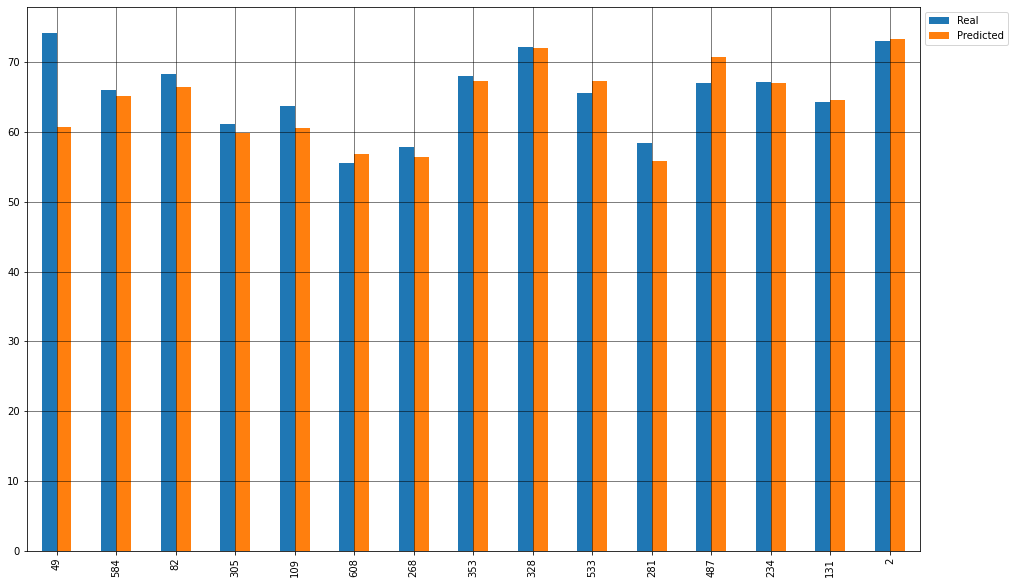

In [38]:
import matplotlib.pyplot as plt
df_predictions_plot = datapredict.head(15)#get the 15 first predictions
df_predictions_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1.00))
plt.show()


In [40]:
datapredict.to_csv('Best pred XGBoost.csv',index=False)

As this model takes a long time to execute (3 hours and 26')I'm going to save the model to use it in future ocasions.

The are two ways to finalize the models:
1-Finalize Your Model with pickle. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file

2-Finalize Your Model with joblib
Joblib is part of the SciPy ecosystem and provides utilities for pipelining Python jobs.
It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently.
This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (like K-Nearest Neighbors).

In this case I'm going to finalize my model using Pickel 

In [44]:
#install the pickle library
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5998 sha256=892a0c222aee5217b74574ca5c2f642957f2f3b96c83a16afc57d0ee81b34139
  Stored in directory: /Users/nuria/Library/Caches/pip/wheels/2a/a4/6c/83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin


In [46]:
import pickle

In [47]:
model_saved = 'xgboost_model.sav'

In [48]:
pickle.dump(Xgboost_reg2, open(model_saved, 'wb'))

In [ ]:
#in the future if I need to use this model again:

#load the model from the disk
#loaded_model = pickle.load(open(model_saved, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)